#Tratamento dos dados

##Leitura e organização do csv 'Aircrafts'

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Bibliotecas utilizadas:
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #Inicialização do seaborn.

#Leitura do arquivo 'aircarfts' do github!
url_aircrafts = 'https://github.com/alanldm/Ciencia_de_Dados/blob/6229bfc9bde193d7a11922bd5cfe6491c8633334/aircrafts.csv?raw=true'
aircrafts = pd.read_csv(url_aircrafts, index_col=0, encoding='latin1')

aircrafts

,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,5092,...,BRAZIL,TPX,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,3600,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,115497,...,BRAZIL,TPR,REGULAR,****,****,ASCENSION,REGULAR,NONE,NaN,2016-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,36454,53473,PUXXX4,3992,ULTRALIGHT,***,***,UNKNOWN,NaN,881,...,BRAZIL,TPP,PRIVATE,SDMH,SDMH,CRUISE,PRIVATE,SUBSTANTIAL,1.0,2016-07-30
2039,36455,53556,PUXXX5,3992,ULTRALIGHT,***,***,UNKNOWN,NaN,0,...,BRAZIL,PET,EXPERIMENTAL,SDMH,SDMH,CRUISE,PRIVATE,DESTROYED,1.0,2016-07-30
2040,38934,60649,ZPBIL,3992,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,1.0,3849,...,NaN,EXT,UNKNOWN,SDEN,SBNF,TAKEOFF,PRIVATE,SUBSTANTIAL,NaN,2016-07-30
2041,38941,60879,ZPTVU,3992,UNKNOWN,WZQ-OKECIE,PZL 106 KRUK,UNKNOWN,NaN,6613,...,NaN,EXT,UNKNOWN,****,****,MANEUVER,AGRICULTURAL,DESTROYED,2.0,2016-07-30


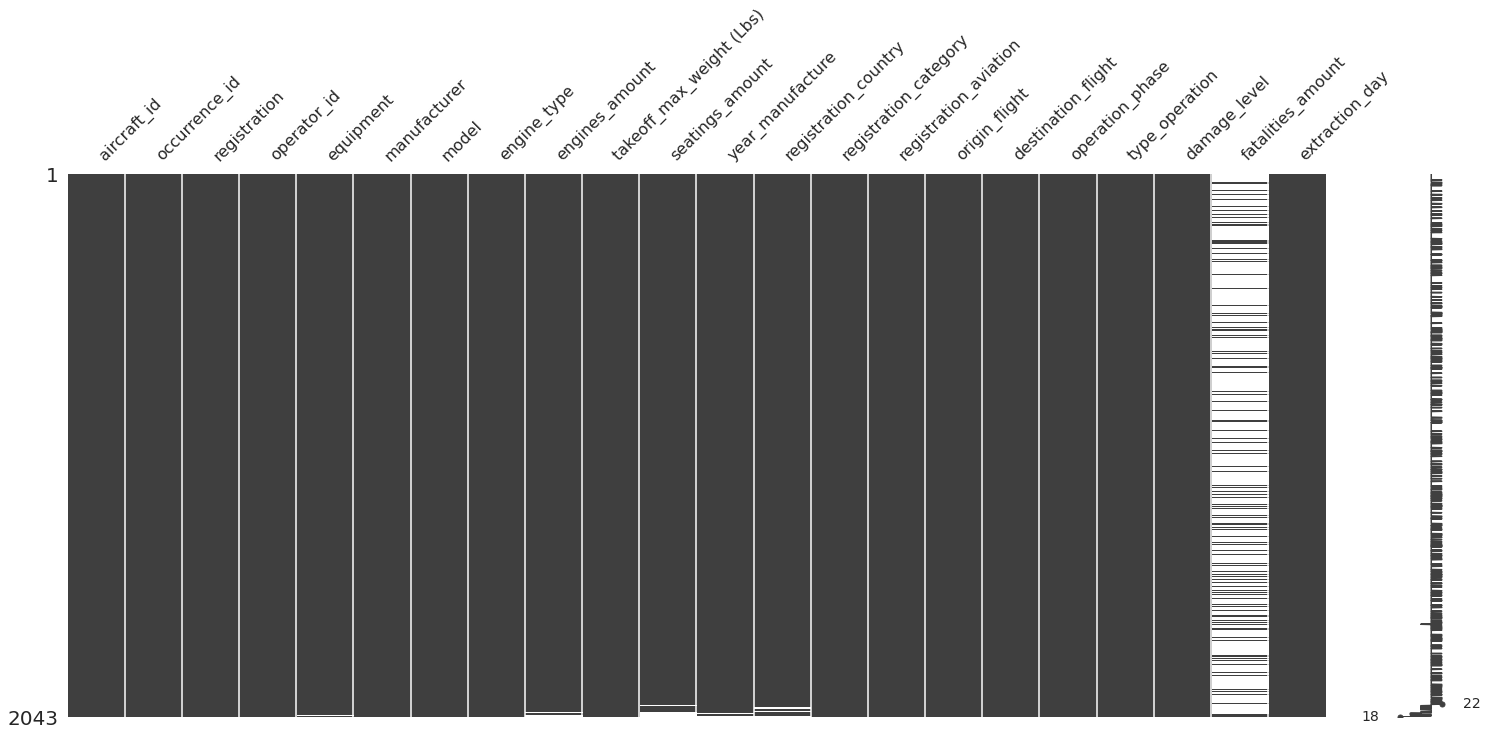

In [ ]:
msno.matrix(aircrafts)

In [ ]:
#Removendo colunas indesejadas do csv 'aircrafts':
aircrafts = aircrafts.drop(columns=["fatalities_amount", "registration","operator_id","registration_country","registration_category","destination_flight","origin_flight","aircraft_id","extraction_day", "takeoff_max_weight (Lbs)", "seatings_amount"])
aircrafts

,occurrence_id,equipment,manufacturer,model,engine_type,engines_amount,year_manufacture,registration_aviation,operation_phase,type_operation,damage_level
0,45602,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1962.0,INSTRUCTION,UNKNOWN,INSTRUCTION,SUBSTANTIAL
1,53551,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1960.0,INSTRUCTION,TAKEOFF,INSTRUCTION,LIGHT
2,43721,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,1966.0,AEROTAXI,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL
3,35556,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,1979.0,PRIVATE,RUN AFTER LANDING,PRIVATE,LIGHT
4,32579,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,1975.0,REGULAR,ASCENSION,REGULAR,NONE
...,...,...,...,...,...,...,...,...,...,...,...
2038,53473,ULTRALIGHT,***,***,UNKNOWN,NaN,2000.0,PRIVATE,CRUISE,PRIVATE,SUBSTANTIAL
2039,53556,ULTRALIGHT,***,***,UNKNOWN,NaN,2015.0,EXPERIMENTAL,CRUISE,PRIVATE,DESTROYED
2040,60649,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,1.0,1997.0,UNKNOWN,TAKEOFF,PRIVATE,SUBSTANTIAL
2041,60879,UNKNOWN,WZQ-OKECIE,PZL 106 KRUK,UNKNOWN,NaN,NaN,UNKNOWN,MANEUVER,AGRICULTURAL,DESTROYED


##Leitura e organização do csv 'Occurrences'

In [ ]:
#Leitura do arquivo 'occurrences' do github!
url_occurrences = 'https://github.com/alanldm/Ciencia_de_Dados/blob/6229bfc9bde193d7a11922bd5cfe6491c8633334/occurrences.csv?raw=true'
occurrences = pd.read_csv(url_occurrences, index_col=0, encoding='latin1')

occurrences

,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,****,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,****,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,36116,SERIOUS INCIDENT,LOSS OF COMPONENT DURING THE FLIGHT,MEDELLIN,EX,COLOMBIA,****,2009-03-26,04:46:00,UNKNOWN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2023,33715,SERIOUS INCIDENT,ANOTHER TYPES,LIMA,EX,PERU,****,2006-10-31,00:00:00,UNKNOWN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2024,25839,ACCIDENT,COLLISION AGAINST OBSTACLE ON THE GROUND,MENDONZA,EX,ARGENTINA,****,2006-01-03,00:00:00,UNKNOWN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2025,49474,ACCIDENT,METEOROLOGICAL PHENOMENOM IN THE AIR,ÁGUAS INTERNACIONAIS,***,BRAZIL,****,2013-09-01,00:00:00,YES,CENIPA,IN PROGRESS,NaN,NaN,NaN,0,1,NaN,2016-07-30


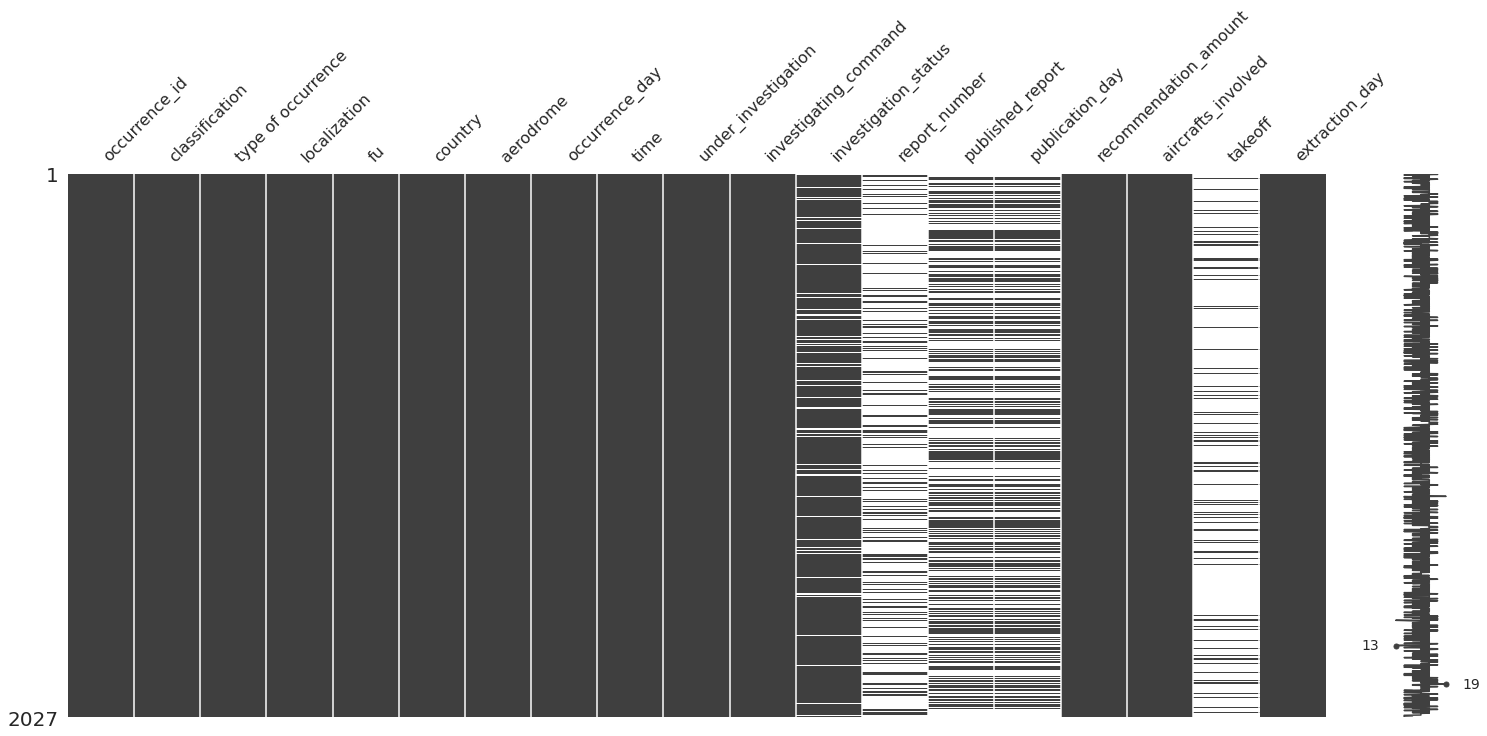

In [ ]:
msno.matrix(occurrences)

In [ ]:
#Removendo colunas do csv 'occurrences':
occurrences = occurrences[occurrences.country=='BRAZIL']
occurrences = occurrences.drop(columns=["aircrafts_involved","recommendation_amount","investigation_status","under_investigation","classification","investigating_command", "country", "localization", "extraction_day","publication_day", "published_report", "report_number", "aerodrome", "takeoff"])
occurrences

,occurrence_id,type of occurrence,fu,occurrence_day,time
0,47965,ENGINE FAILURE DURING THE FLIGHT,RO,2013-05-05,11:00:00
1,50313,LANDING WITHOUT LANDING GEAR,RO,2013-11-25,12:32:00
2,34078,LOSS OF CONTROL ON THE GROUND,RO,2008-08-07,15:10:00
3,44988,SLOW LANDING,RR,2011-08-11,17:00:00
4,38855,LOSS OF CONTROL IN THE AIR,RS,2009-12-28,17:30:00
...,...,...,...,...,...
2014,44380,UNKNOWN,MT,2010-12-03,03:00:00
2015,30895,LOSS OF CONTROL IN THE AIR,MT,2007-10-31,10:30:00
2016,28236,ENGINE FAILURE DURING THE FLIGHT,MT,2006-12-13,12:10:00
2017,27389,HARD LANDING,GO,2006-06-30,14:00:00


##Leitura dos dados do IBGE
obs: esses dados serão utilizados na geração de um gráfico geográfico.

In [ ]:
!pip install geopandas #Instalando a biblioteca geopandas!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 35.1 MB/s 
     |████████████████████████████████| 16.7 MB 40.6 MB/s 


In [ ]:
import geopandas as gpd #Importando a geopandas.

#Leitura dos dados do IBGE:
url_ibge = '/content/BRUFE250GC_SIR.shp'
Estados = gpd.read_file(url_ibge)
Estados

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46753 -8.81744, -35.46659 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,AMAZONAS,NORTE,13,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
4,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
5,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
6,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.20054 -15.50026, -48.14051 -15.5..."
7,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
8,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
9,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."


##Merge dos dataframes 'aircrafts' e 'occurrences'
obs: junção a partir da coluna comum aos dois dataframes: 'occurrence_id'.

In [ ]:
#Mergeando os dois dataframes:

dados = pd.merge(aircrafts, occurrences, how='inner', on=['occurrence_id'])
dados

,occurrence_id,equipment,manufacturer,model,engine_type,engines_amount,year_manufacture,registration_aviation,operation_phase,type_operation,damage_level,type of occurrence,fu,occurrence_day,time
0,45602,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1962.0,INSTRUCTION,UNKNOWN,INSTRUCTION,SUBSTANTIAL,UNKNOWN,SP,2011-06-14,20:00:00
1,53551,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1960.0,INSTRUCTION,TAKEOFF,INSTRUCTION,LIGHT,LOSS OF CONTROL ON THE GROUND,SP,2015-11-05,19:15:00
2,43721,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,1966.0,AEROTAXI,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,ABOUT LANDING GEAR,CE,2010-12-15,09:00:00
3,35556,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,1979.0,PRIVATE,RUN AFTER LANDING,PRIVATE,LIGHT,ABOUT LANDING GEAR,MA,2009-02-04,15:25:00
4,32579,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,1975.0,REGULAR,ASCENSION,REGULAR,NONE,ENGINE FAILURE DURING THE FLIGHT,AM,2008-06-07,14:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,53472,NaN,***,***,UNKNOWN,NaN,2015.0,EXPERIMENTAL,TAKEOFF,PRIVATE,SUBSTANTIAL,COLLISION AGAINST OBSTACLE DURING THE FLIGHT,TO,2015-07-28,21:05:00
2031,53473,ULTRALIGHT,***,***,UNKNOWN,NaN,2000.0,PRIVATE,CRUISE,PRIVATE,SUBSTANTIAL,STRUCTURAL FAILURE,SP,2015-08-21,20:50:00
2032,53556,ULTRALIGHT,***,***,UNKNOWN,NaN,2015.0,EXPERIMENTAL,CRUISE,PRIVATE,DESTROYED,STRUCTURAL FAILURE,SP,2015-11-02,09:30:00
2033,60649,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,1.0,1997.0,UNKNOWN,TAKEOFF,PRIVATE,SUBSTANTIAL,ENGINE FAILURE DURING THE FLIGHT,SC,2015-12-31,14:00:00


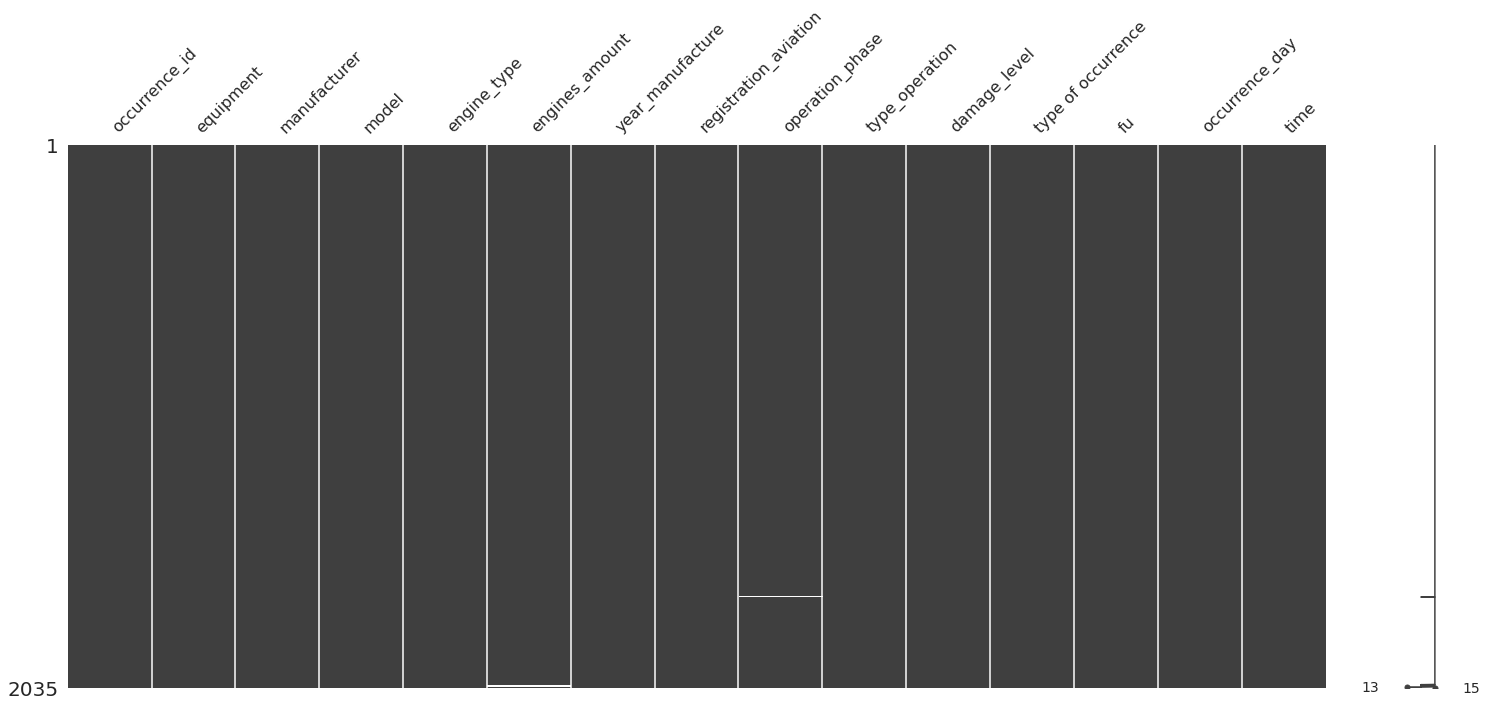

In [ ]:
msno.matrix(dados)

#Gráficos
Os gráficos foram gerados a partir do dataframe 'dados' que surgiu do merge.

##Gráficos com relação ao tempo

###Gráfico de barras: Anos com mais acidentes

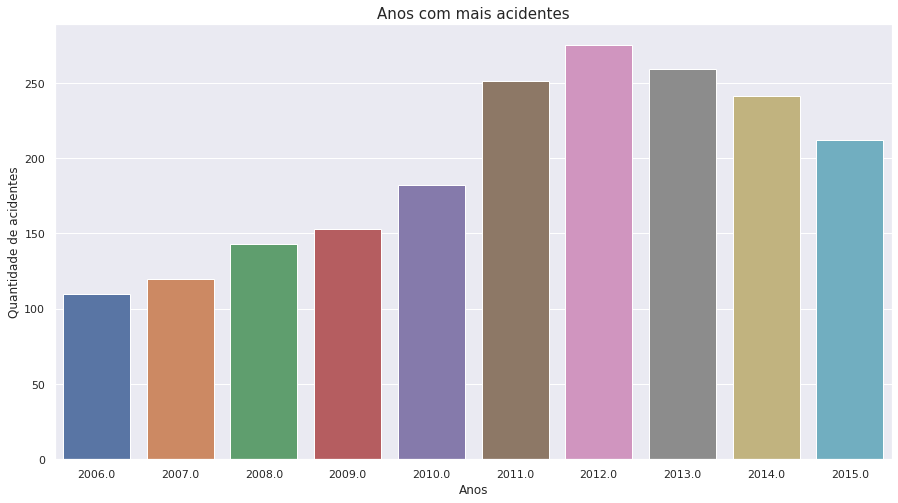

In [ ]:
#Calculando a idade das aeronaves:
idade = dados.loc[:,["year_manufacture","occurrence_day"]] #Criando um dataframe apenas com as colunas do ano de fabricação e a data do acidente.
idade.dropna(inplace=True) #Removendo os dados faltantes.

#Extraindo as informações das strings da coluna dos dias dos acidentes.
idade['occurrence_year'] = idade['occurrence_day'].str.slice(start=0,stop=4)
idade['occurrence_month'] = idade['occurrence_day'].str.slice(start=5, stop=7)
idade['year_manufacture'] = idade['year_manufacture'].astype(float) #Transformando os dados de strings para floats.
idade['occurrence_year'] = idade['occurrence_year'].astype(float) #Transformando os dados de strings para floats.
idade['age'] = idade['occurrence_year'] - idade['year_manufacture'] #Calculando a idade das aeronaves.
idade = idade[idade.year_manufacture!=0] 
anos_acidente = idade.groupby("occurrence_year").count() #Criando um dataframe a partir dos dados agrupados dos anos.
anos_acidente.reset_index(inplace=True) #Reorganizando os índices.
anos_acidente.drop(columns=["year_manufacture", "occurrence_day", "occurrence_month"], inplace=True) #Deixando apenas a coluna dos anos.
anos_acidente.rename(columns={"occurrence_year":"Anos", "age":"Quantidades"}, inplace=True) #Renomeando as colunas.

#Plotando o gráfico de barras.
plt.figure(figsize=(15,8))
plt.title("Anos com mais acidentes", fontsize=15)
sns.barplot(data=anos_acidente, x="Anos", y="Quantidades")
plt.xlabel("Anos", fontsize=12)
plt.ylabel("Quantidade de acidentes", fontsize=12);

###Histogramas: Idade das aeronaves e Meses com mais acidentes.

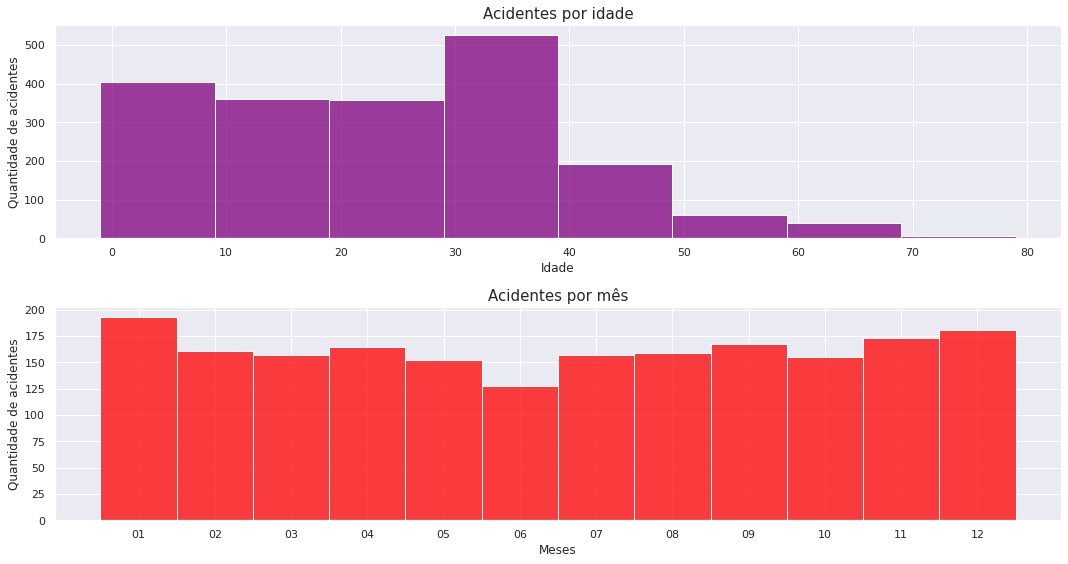

In [ ]:
#Plotando as idades e meses:
fig = plt.subplots(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Acidentes por idade", fontsize=15)
sns.histplot(data=idade, x="age", binwidth=10, color="purple")
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Quantidade de acidentes", fontsize=12)
plt.subplot(2,1,2)
plt.title("Acidentes por mês", fontsize=15)
idade = idade.sort_values(by="occurrence_month")
sns.histplot(data=idade, x="occurrence_month", binwidth=10, color="red")
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Quantidade de acidentes", fontsize=12)
plt.tight_layout()
plt.show()

##Gráfico de barras: Empresas com mais acidentes
Top 10 empresas com mais acidentes no dataset.

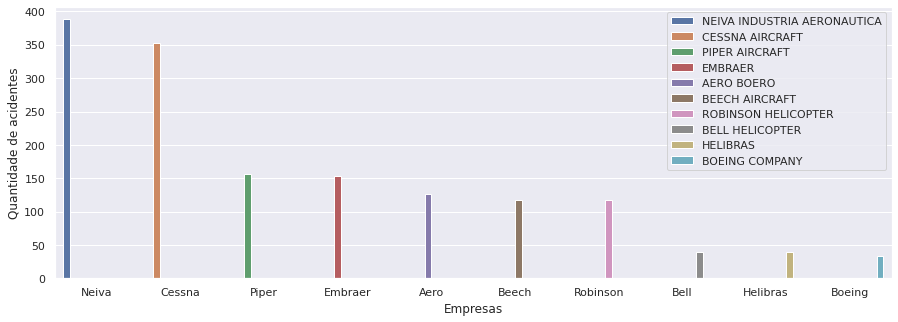

In [ ]:
#Gerando um dataframe com as colunas de empresas ('manufacturer') e o identificador de acidentes ('occurrence_id').
empresas = dados.loc[:,["manufacturer", "occurrence_id"]]
empresas = empresas[empresas.manufacturer!="***"] #Removendo os valores inválidos.

#Agrupando os dados a partir da coluna das empresas.
top10 = empresas.groupby("manufacturer").count()
top10 = top10[top10.occurrence_id>=34] #Filtrando para ficar apenas com as 10 empresas com mais acidentes.
top10.reset_index(inplace=True) #Reorganizando os índices.
top10.rename(columns={"manufacturer":"Empresas","occurrence_id":"Quantidades"}, inplace=True) #Renomeando as colunas.
top10.sort_values(by="Quantidades", inplace=True, ascending=False) #Ordenando as empresas.

#Plotando o gráfico de barras.
plt.figure(figsize=(15,5))
sns.barplot(data=top10, x=["Neiva", "Cessna", "Piper", "Embraer", "Aero", "Beech", "Robinson", "Bell", "Helibras", "Boeing"], y="Quantidades", hue="Empresas")
plt.legend(loc="upper right")
plt.xlabel("Empresas")
plt.ylabel("Quantidade de acidentes");

##Gráfico de setores: Registro e Operação
Análise comparativa entre as aeronaves que se acidentaram exercendo a função para a qual foram registradas e as que operavam 'irregularmente'.

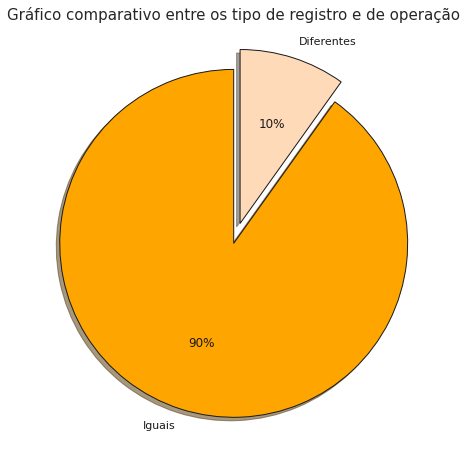

In [ ]:
#Gerando um dataframe com as colunas de 'registration_aviation' e 'type_operation':
funcao = dados.loc[:,["registration_aviation","type_operation"]]

#Removendo dados inconclusivos: UNKNOWN.
funcao = funcao[(funcao.registration_aviation!="UNKNOWN") & (funcao.type_operation!="UNKNOWN")]

#Criando uma coluna de booleanos, onde o valor True representa as aeronaves que se acidentaram operando na função para qual foram registradas.
funcao["function"] = funcao.registration_aviation == funcao.type_operation

#Criando um vetor para armazenar os valores verdadeiros e falsos.
qtd = [funcao.function[funcao.function==True].count(), funcao.function[funcao.function==False].count()]

#Plotando o gráfico de setores.
plt.figure(figsize=(15,8))
plt.title("Gráfico comparativo entre os tipo de registro e de operação", fontsize=15)
plt.pie(qtd, labels=["Iguais", "Diferentes"], colors=["#FFA500", "#FFDAB9"], explode=(0, 0.12), wedgeprops={"edgecolor":"k"}, shadow=True, autopct='%1.f%%', startangle=90, textprops=dict(color='k'))
plt.show()

##Gráfico de barras: Estágio com mais acidentes
obs: serão plotados os 5 momentos com mais acidentes.

Text(0, 0.5, 'Quantidade de acidentes')

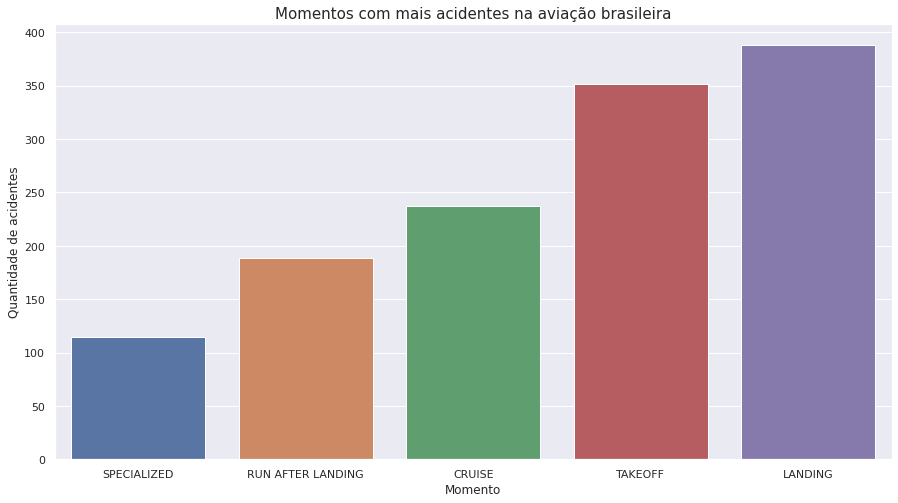

In [ ]:
#Gerando um dataframe com as colunas de fase de operação ('operation_phase') e de identificador do acidente ('occurrence_id').
fase = dados.loc[:,["occurrence_id", "operation_phase"]]

#Removendo os valores faltantes e inconclusivos.
fase.dropna(inplace=True)
fase = fase[fase.operation_phase!="UNKNOWN"]

#Agrupando os dados com base no momento do acidente.
fase = fase.groupby("operation_phase").count()
fase.reset_index(inplace=True) #Reorganizando os índices.

#Renomeando as colunas do dataframe.
fase.rename(columns={"operation_phase":"Fase", "occurrence_id":"Quantidades"}, inplace=True)
fase = fase[fase.Quantidades>100] #Filtrando para manter apenas os Top 5 momentos com mais acidentes.
fase.sort_values(by="Quantidades", inplace=True, ascending=True) #Ordenando os dados.

#Plotando o gráfico de barras.
plt.figure(figsize=(15,8))

sns.barplot(data=fase, x="Fase", y="Quantidades")
plt.title("Momentos com mais acidentes na aviação brasileira", fontsize=15)
plt.xlabel("Momento", fontsize=12)
plt.ylabel("Quantidade de acidentes", fontsize=12)

##Gráfico de setores: Tipos de aeronaves

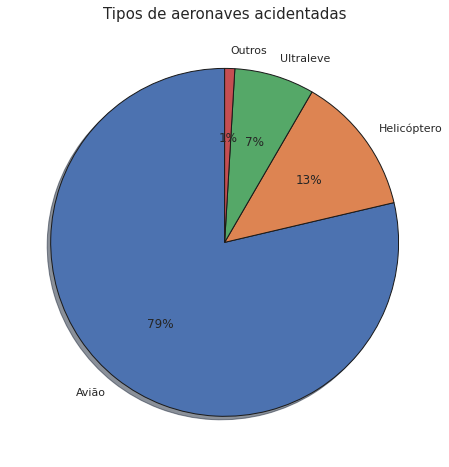

In [ ]:
#Gerando um dataframe com os tipos de aeronaves ('equipment') e os identificadores dos acidentes ('occurrence_id'). 
tipos = dados[["occurrence_id","equipment"]]
tipos = tipos[tipos.equipment!='UNKNOWN']

#Agrupando os dados com base no tipo de aeronave.
x = tipos.groupby("equipment").count()

x.reset_index(inplace=True) #Reorganizando os índices.
x = x.append({"equipment":"Outros", "occurrence_id":19}, ignore_index=True)
x = x[x.occurrence_id>=19]

#Plotando o gráfico de setores.
plt.figure(figsize=(15,8))
plt.title("Tipos de aeronaves acidentadas", fontsize=15)
plt.pie(x.occurrence_id, labels=["Avião", "Helicóptero", "Ultraleve", "Outros"], wedgeprops={"edgecolor":"k"}, shadow=True, autopct='%1.f%%', startangle=90)
plt.show()

##Gráfico de setores: Dano sofrido na aeronave

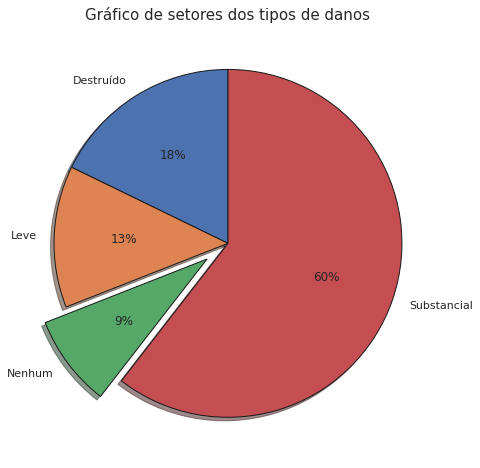

In [ ]:
#Montando o dataframe com a coluna de ids ('occurrence_id') e de danos ('damage_level').
dano = dados.loc[:,["occurrence_id", "damage_level"]]
dano = dano[dano.damage_level!="UNKNOWN"] #Removendo dados inconsistentes.
dano = dano.groupby("damage_level").count() #Agrupando os dados com base no nível do dano.
dano.reset_index(inplace=True) #Reorganizando os índices do dataframe.
dano.rename(columns={"damage_level":"Danos", "occurrence_id":"Quantidades"}, inplace=True) #Renomeando as colunas do dataframe.

#Plotando o gráfico de setores.
plt.figure(figsize=(15,8))
plt.title("Gráfico de setores dos tipos de danos", fontsize=15)
plt.pie(dano.Quantidades, labels=["Destruído", "Leve", "Nenhum", "Substancial"], autopct='%1.f%%', startangle=90, shadow=True, wedgeprops={"edgecolor":"k"}, explode=(0, 0, 0.15, 0));

##Gráfico de barras: Número de acidentes pelo número de motores nas aeronaves

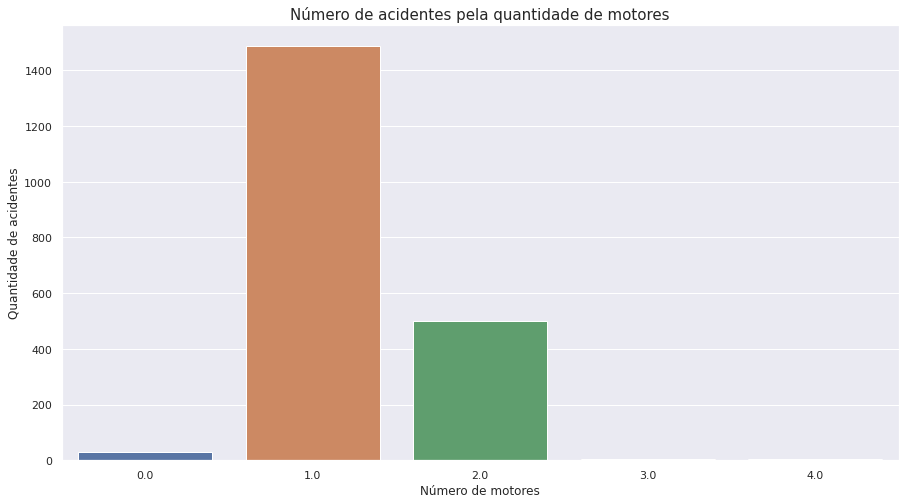

In [ ]:
motores = dados.loc[:,["occurrence_id", "engines_amount"]] #Pegando apenas as colunas de id e de número de motores.
motores.dropna(inplace=True) #Removendo as linhas nulas.
motores = motores.groupby("engines_amount").count() #Contando o número de acidentes pela quantidade de motores.
motores.reset_index(inplace=True) #Reorganizando os índices.
motores.rename(columns={"engines_amount":"Motores", "occurrence_id":"Quantidades"}, inplace=True) #Trocando o nome das colunas.
motores.sort_values(by="Quantidades", inplace=True, ascending=True) #Ordenando os dados.

#Plotando o gráfico:
plt.figure(figsize=(15,8))
plt.title("Número de acidentes pela quantidade de motores", fontsize=15)
sns.barplot(data=motores, x="Motores", y="Quantidades") 
plt.xlabel("Número de motores", fontsize=12)
plt.ylabel("Quantidade de acidentes", fontsize=12)
plt.show()

##Gráfico de barras: Modelos com mais acidentes
Top 11 aeronaves com mais registros de acidentes.

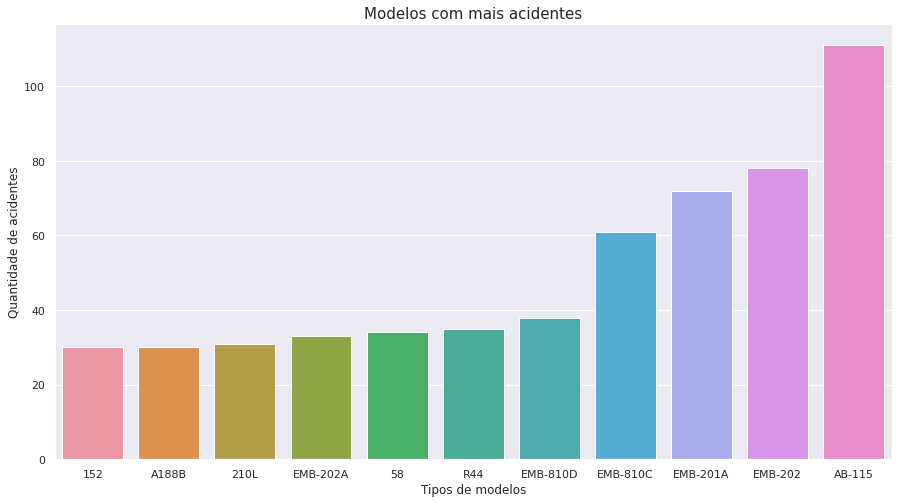

In [ ]:
#Gerando um dataframe de modelos a partir das colunas de modelos ('model') e de ids ('occurrence_id').
modelos = dados[["occurrence_id", "model"]]
modelos = modelos[modelos.model!="***"] #Filtrando os dados inconsistentes.
modelos = modelos.groupby("model").count() #Agrupando os valores a partir da coluna de modelos.
modelos.reset_index(inplace=True) #Reorganizando os índices.
modelos.rename(columns={"model":"Modelos", "occurrence_id":"Quantidades"}, inplace=True) #Trocando o nome das colunas.
modelos = modelos[modelos.Quantidades>=30] #Filtrando os dados para pegar apenas os 11 com mais acidentes.
modelos.sort_values(by="Quantidades", inplace=True, ascending=True) #Ordenando os dados.

#Plotando o gráfico de barras
plt.figure(figsize=(15,8))
plt.title("Modelos com mais acidentes", fontsize=15)
sns.barplot(data=modelos, x="Modelos", y="Quantidades") 
plt.ylabel("Quantidade de acidentes", fontsize=12)
plt.xlabel("Tipos de modelos", fontsize=12);

##Gráfico de setores: Período noturno e diurno

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


([<matplotlib.patches.Wedge at 0x7f0dd8fd11d0>,
 [Text(-0.929487990115181, -0.5882619112535176, 'Dia'),
  Text(0.929488045192232, 0.5882618242285687, 'Noite')],
 [Text(-0.506993449153735, -0.3208701334110095, '68%'),
  Text(0.5069934791957629, 0.3208700859428556, '32%')])

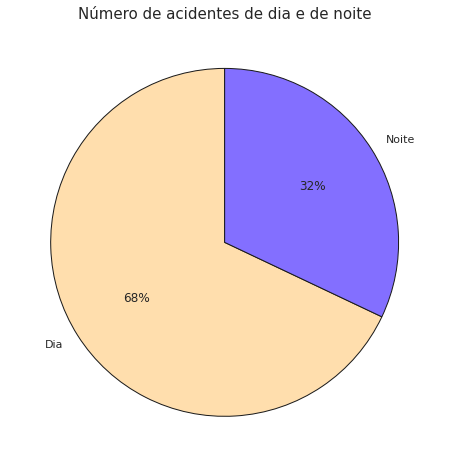

In [ ]:
#Gerando dataframe com os dados de tempo ('time') e os identificadores de acidentes ('occurrence_id').
periodo = dados.loc[:,["time", "occurrence_id"]]

#Tratando os dados.
periodo["Hora"] = periodo["time"].str.slice(start=0, stop=2) #Pegando apenas a hora da string.
periodo["Hora"] = periodo["Hora"].astype(int) #Mudando do tipo string para inteiro.
periodo.Hora[(periodo.Hora>=5) & (periodo.Hora<=18)] = "Dia" #Indicando quais horários representam o dia.
periodo.Hora[periodo.Hora!="Dia"] = "Noite"  #Indicando quais horários representam a noite.
periodo = periodo.groupby("Hora").count() #Agrupando os dados com base na hora.
periodo.reset_index(inplace=True) #Reorganizando os índices.  
periodo.rename(columns={"Hora":"Período", "time":"Quantidades"}, inplace=True) #Mudando o nome das colunas.

#Gerando o gráfico de setores
plt.figure(figsize=(15,8))
plt.title("Número de acidentes de dia e de noite", fontsize=15)
plt.pie(periodo.Quantidades, labels=periodo["Período"], autopct='%1.f%%', colors=["#FFDEAD", "#836FFF"], startangle=90, wedgeprops={"edgecolor":"k"})

##Mapa: Estados com mais acidentes

In [ ]:
#Gerando um dataframe com as colunas dos Estados, 'fu', e o identificador da ocorrência, 'occurrence_id'.
estados = dados[["fu","occurrence_id"]]

#Removendo informações inconsistentes:
estados = estados[estados.fu!='***']

#Agrupando os dados com base na coluna de Estados.
estados = estados.groupby('fu').count()
estados.reset_index(inplace=True) #Reorganizando os índices

#Trocando as siglas dos Estados pelos seus nomes, objetivando facilitar o merge com o dataframe do IBGE.
estados.loc[estados.fu=='AC', 'fu'] = 'ACRE'
estados.loc[estados.fu=='AL', 'fu'] = 'ALAGOAS'
estados.loc[estados.fu=='AM', 'fu'] = 'AMAZONAS'
estados.loc[estados.fu=='AP', 'fu'] = 'AMAPÁ'
estados.loc[estados.fu=='BA', 'fu'] = 'BAHIA'
estados.loc[estados.fu=='CE', 'fu'] = 'CEARÁ'
estados.loc[estados.fu=='DF', 'fu'] = 'DISTRITO FEDERAL'
estados.loc[estados.fu=='ES', 'fu'] = 'ESPÍRITO SANTO'
estados.loc[estados.fu=='GO', 'fu'] = 'GOIÁS'
estados.loc[estados.fu=='MA', 'fu'] = 'MARANHÃO'
estados.loc[estados.fu=='MG', 'fu'] = 'MINAS GERAIS'
estados.loc[estados.fu=='MS', 'fu'] = 'MATO GROSSO DO SUL'
estados.loc[estados.fu=='MT', 'fu'] = 'MATO GROSSO'
estados.loc[estados.fu=='PA', 'fu'] = 'PARÁ'
estados.loc[estados.fu=='PB', 'fu'] = 'PARAÍBA'
estados.loc[estados.fu=='PE', 'fu'] = 'PERNAMBUCO'
estados.loc[estados.fu=='PI', 'fu'] = 'PIAUÍ'
estados.loc[estados.fu=='PR', 'fu'] = 'PARANÁ'
estados.loc[estados.fu=='RJ', 'fu'] = 'RIO DE JANEIRO'
estados.loc[estados.fu=='RN', 'fu'] = 'RIO GRANDE DO NORTE'
estados.loc[estados.fu=='RO', 'fu'] = 'RONDÔNIA'
estados.loc[estados.fu=='RR', 'fu'] = 'RORAIMA'
estados.loc[estados.fu=='RS', 'fu'] = 'RIO GRANDE DO SUL'
estados.loc[estados.fu=='SC', 'fu'] = 'SANTA CATARINA'
estados.loc[estados.fu=='SE', 'fu'] = 'SERGIPE'
estados.loc[estados.fu=='SP', 'fu'] = 'SÃO PAULO'
estados.loc[estados.fu=='TO', 'fu'] = 'TOCANTINS'
estados.rename(columns={'occurrence_id':'Quantidades', 'fu':'NM_ESTADO'}, inplace=True) #Trocando os nomes das colunas para se realizar o merge.

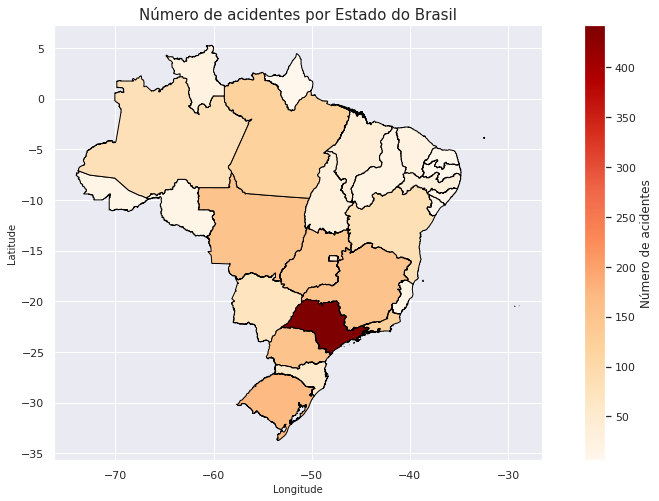

In [ ]:
%matplotlib inline
mapa = pd.merge(Estados, estados,  how='inner', on=['NM_ESTADO']) #Merge entre os dataframes do IBGE e o gerado na célula anterior.

#Plotando o gráfico geográfico.
mapa.plot(column='Quantidades', legend=True, cmap='OrRd', edgecolor='black', figsize=(15,8), legend_kwds={'label':'Número de acidentes'})
plt.title("Número de acidentes por Estado do Brasil", fontsize=15);
plt.xlabel("Longitude", fontsize=10);
plt.ylabel("Latitude", fontsize=10);

In [ ]:
Estados_geo = Estados.to_json()
Estados_geo

Output hidden; open in https://colab.research.google.com to view.

## Gráficos interativos

### Tipo de operação por região do Brasil

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tipo_op = dados.loc[:, ['type_operation', 'fu']]

tipo_op = tipo_op[tipo_op.type_operation != 'UNKNOWN']
tipo_op

,type_operation,fu
0,INSTRUCTION,SP
1,INSTRUCTION,SP
2,AEROTAXI,CE
3,PRIVATE,MA
4,REGULAR,AM
...,...,...
2029,PRIVATE,SC
2030,PRIVATE,TO
2031,PRIVATE,SP
2032,PRIVATE,SP


In [ ]:
sudeste = tipo_op[(tipo_op.fu == 'SP')|(tipo_op.fu == 'RJ')|(tipo_op.fu == 'ES')|(tipo_op.fu == 'MG')]
sul = tipo_op[(tipo_op.fu == 'RS')|(tipo_op.fu == 'SC')|(tipo_op.fu == 'PR')]
centro = tipo_op[(tipo_op.fu == 'DF')|(tipo_op.fu == 'GO')|(tipo_op.fu == 'MT')|(tipo_op.fu == 'MS')]
norte = tipo_op[(tipo_op.fu == 'AM')|(tipo_op.fu == 'PA')|(tipo_op.fu == 'RR')|(tipo_op.fu == 'RO')|(tipo_op.fu == 'AC')|(tipo_op.fu == 'TO')|(tipo_op.fu == 'AP')]
nordeste = tipo_op[(tipo_op.fu == 'RN')|(tipo_op.fu == 'PB')|(tipo_op.fu == 'PE')|(tipo_op.fu == 'AL')|(tipo_op.fu == 'SE')|(tipo_op.fu == 'BA')|(tipo_op.fu == 'CE')|(tipo_op.fu == 'MA')|(tipo_op.fu == 'PI')]
sudeste

,type_operation,fu
0,INSTRUCTION,SP
1,INSTRUCTION,SP
5,PRIVATE,SP
7,INSTRUCTION,SP
9,AEROTAXI,RJ
...,...,...
2012,NOT REGULAR,SP
2018,PRIVATE,SP
2019,PRIVATE,SP
2031,PRIVATE,SP


In [ ]:
sudeste_group = sudeste.groupby('type_operation').count()
sul_group = sul.groupby('type_operation').count()
norte_group = norte.groupby('type_operation').count()
centro_group = centro.groupby('type_operation').count()
nordeste_group = nordeste.groupby('type_operation').count()
sudeste_group

,fu
type_operation,
AEROTAXI,62
AGRICULTURAL,49
EXPERIMENTAL,77
INSTRUCTION,181
NOT REGULAR,4
POLICIAL,11
PRIVATE,271
REGULAR,43
SPECIALIZED,18


In [ ]:
transp_sudeste = sudeste_group.T
transp_sudeste.reset_index(drop=True, inplace=True)

transp_sul = sul_group.T
transp_sul.reset_index(drop=True, inplace=True)

transp_norte = norte_group.T
transp_norte.reset_index(drop=True, inplace=True)

transp_centro = centro_group.T
transp_centro.reset_index(drop=True, inplace=True)

transp_nordeste = nordeste_group.T
transp_nordeste.reset_index(drop=True, inplace=True)

df_ok = pd.DataFrame(columns=['AEROTAXI', 'AGRICULTURAL', 'EXPERIMENTAL', 'INSTRUCTION', 'NOT REGULAR', 'POLICIAL', 'PRIVATE', 'REGULAR', 'SPECIALIZED'])
df_ok

df_ok = df_ok.append(transp_sul, ignore_index=True)
df_ok = df_ok.append(transp_sudeste, ignore_index=True)
df_ok = df_ok.append(transp_norte, ignore_index=True)
df_ok = df_ok.append(transp_nordeste, ignore_index=True)
df_ok = df_ok.append(transp_centro, ignore_index=True)

df_ok.loc[4, ['NOT REGULAR']] = 0

df_ok['TOTAL'] = df_ok['AEROTAXI'] + df_ok['EXPERIMENTAL'] + df_ok['INSTRUCTION'] + df_ok['NOT REGULAR'] + df_ok['POLICIAL'] + df_ok['PRIVATE'] + df_ok['REGULAR'] + df_ok['SPECIALIZED']
df_ok

,AEROTAXI,AGRICULTURAL,EXPERIMENTAL,INSTRUCTION,NOT REGULAR,POLICIAL,PRIVATE,REGULAR,SPECIALIZED,TOTAL
0,16,95,27,126,1,4,92,9,11,286
1,62,49,77,181,4,11,271,43,18,667
2,123,11,5,7,4,1,122,9,2,273
3,46,29,16,15,5,9,90,13,7,201
4,24,80,28,37,0,12,197,15,4,317


In [ ]:
regioes = gpd.read_file('/content/regioes_2010.shp')
completo = pd.concat([regioes, df_ok], axis=1)
completo

,id,nome,sigla,geometry,AEROTAXI,AGRICULTURAL,EXPERIMENTAL,INSTRUCTION,NOT REGULAR,POLICIAL,PRIVATE,REGULAR,SPECIALIZED,TOTAL
0,1,Sul,S,"MULTIPOLYGON (((-52.06416 -22.53384, -52.05556...",16,95,27,126,1,4,92,9,11,286
1,2,Sudeste,SE,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804...",62,49,77,181,4,11,271,43,18,667
2,3,Norte,N,"MULTIPOLYGON (((-66.61930 -9.89360, -66.62231 ...",123,11,5,7,4,1,122,9,2,273
3,4,Nordeste,NE,"MULTIPOLYGON (((-35.15204 -8.91295, -35.15366 ...",46,29,16,15,5,9,90,13,7,201
4,5,Centro-Oeste,CO,"MULTIPOLYGON (((-47.30861 -16.03549, -47.31095...",24,80,28,37,0,12,197,15,4,317


In [ ]:
regioes_geo = regioes.to_json()
regioes_geo

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium

crs = {'init': 'epsg:4326'}
regioes.to_crs(crs, inplace=True)

#Coordenadas x e y do centro do Brasil
y = regioes.centroid.y.iloc[0]
x = regioes.centroid.x.iloc[0]

#Plotando a base do mapa
base = folium.Map([y, x], zoom_start=4, tiles='OpenStreetMap')

#Plotar cores de cada região
folium.Choropleth(
    geo_data=regioes_geo,
    name='choropleth',
    data=completo,
    columns=['nome', 'TOTAL'],
    key_on='feature.properties.nome',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Quantidade de acidentes por região'
).add_to(base)


#Plotando uma camada para cada região do Brasil
for i in range(len(completo)):
  style1 = {'color': 'red'}
  geo = folium.GeoJson(completo[i:i+1], name=completo['nome'][i], style_function=lambda x: {'fillColor': '#FF000000', 'color': 'black', 'weight': 0.5}) #Pegando cada linha do dataframe e atribuindo um nome a ela
  label = "<h4>" + str(completo['nome'][i]) + "<\h4> <\h5> Total: " + str(completo['TOTAL'][i]) + "<\h5> <h6> Aerotáxi: " +str(completo['AEROTAXI'][i])+ "<\h6> <h6> Agricultura: " +str(completo['AGRICULTURAL'][i])+ "<\h6> <h6> Experimental: "+str(completo['EXPERIMENTAL'][i])+ "<\h6> <h6> Instrução: "+str(completo['INSTRUCTION'][i])+ "<\h6> <h6> Irregular: "+str(completo['NOT REGULAR'][i])+ "<\h6> <h6> Policial: "+str(completo['POLICIAL'][i])+ "<\h6> <h6> Privado: "+str(completo['PRIVATE'][i])+ "<\h6> <h6> Regular: "+str(completo['REGULAR'][i])+ "<\h6> <h6> Especializado: "+str(completo['SPECIALIZED'][i])+ "<\h6>"
  folium.Popup(label, max_width=300).add_to(geo) #Adicionando o popup àquela camada
  geo.add_to(base) #Adicionando a camada na base

base

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


KeyboardInterrupt: ignored

In [ ]:
regioes